# １、SP500について分析

## ローカル線形トレンドモデル+周期性モデルで、一年の推移を予測する

In [27]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

In [28]:
import math

#精度の評価:RMSLE、logとルートを取ると、異なるスケールの分析も比較できるように
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [29]:
import pandas_datareader as pdr
import datetime 
SP500 = pdr.get_data_yahoo('^GSPC', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))
HANG_SENG_INDEX = pdr.get_data_yahoo('^HSI', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))
CAC_40 = pdr.get_data_yahoo('^FCHI', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))
Nikkei_225 = pdr.get_data_yahoo('^N225', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))

In [30]:
SP500_ts=SP500["Adj Close"]
HANG_SENG_INDEX_ts=HANG_SENG_INDEX["Adj Close"]
CAC_40_ts=CAC_40["Adj Close"]
Nikkei_225_ts=Nikkei_225["Adj Close"]

## 2019年1月24日から予測する。

In [32]:
SP500_ts.loc["2019-01-24":]=np.NaN
HANG_SENG_INDEX_ts.loc["2019-01-24":]=np.NaN
CAC_40_ts.loc["2019-01-24":]=np.NaN
Nikkei_225_ts.loc["2019-01-24":]=np.NaN

In [33]:
import pandas_datareader as pdr
import datetime 
SP500 = pdr.get_data_yahoo('^GSPC', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))
HANG_SENG_INDEX = pdr.get_data_yahoo('^HSI', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))
CAC_40 = pdr.get_data_yahoo('^FCHI', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))
Nikkei_225 = pdr.get_data_yahoo('^N225', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Optimization terminated successfully.
         Current function value: 3.698649
         Iterations: 27
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 3.698649
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                          Unobserved Components Results                           
Dep. Variable:                  Adj Close   No. Observations:                 1844
Model:             random walk with drift   Log Likelihood               -6820.309
Date:                    Sat, 01 Feb 2020   AIC                          13642.617
Time:                            00:13:11   BIC                          13648.136
Sample:                                 0   HQIC                         13644.652
                                   - 1844                                         
Covariance Type:                      opg                                         
                   coef    st

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1661: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


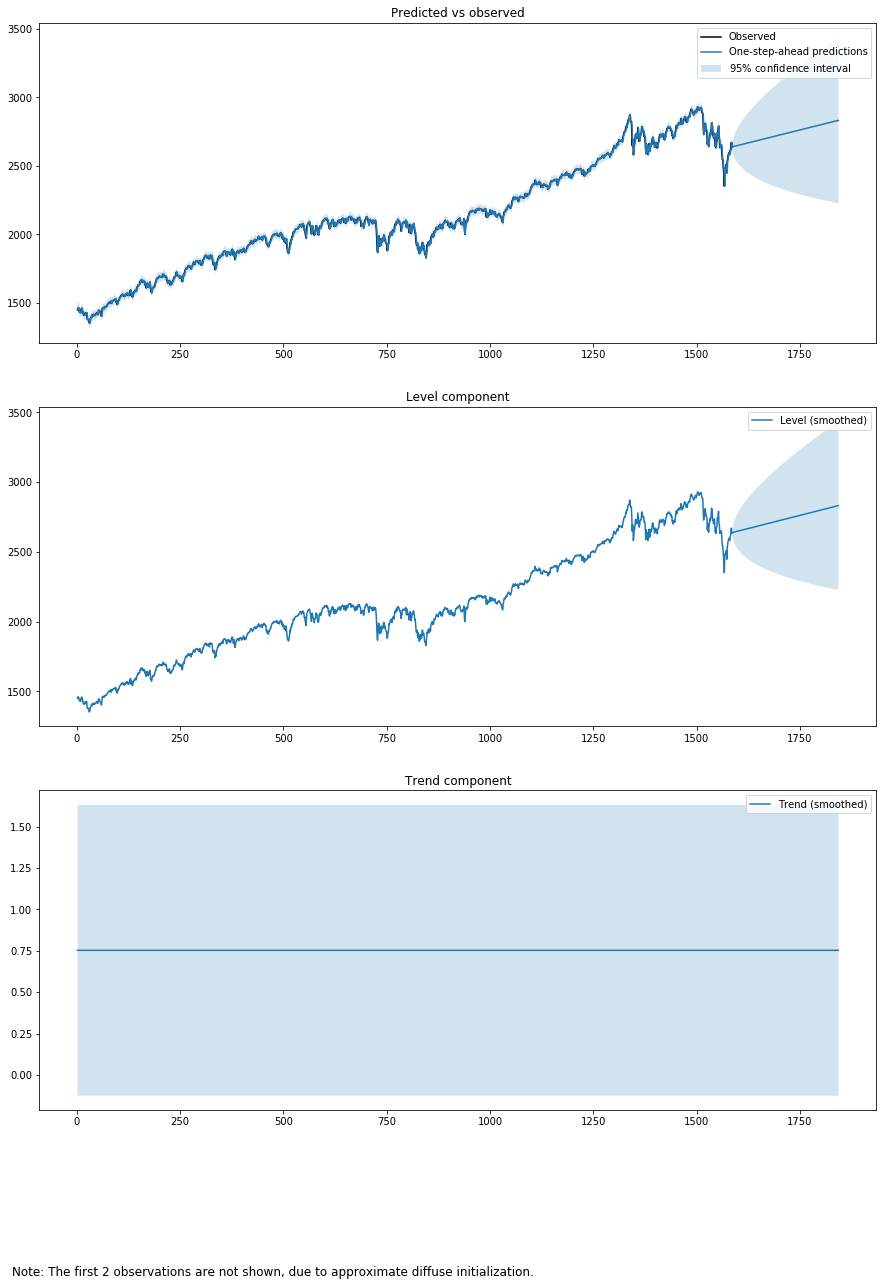

In [36]:
mod_season_rw = sm.tsa.UnobservedComponents(
    SP500_ts,
    'random walk with drift')

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_rw = mod_season_rw.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_rw.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_rw.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_rw.plot_components()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


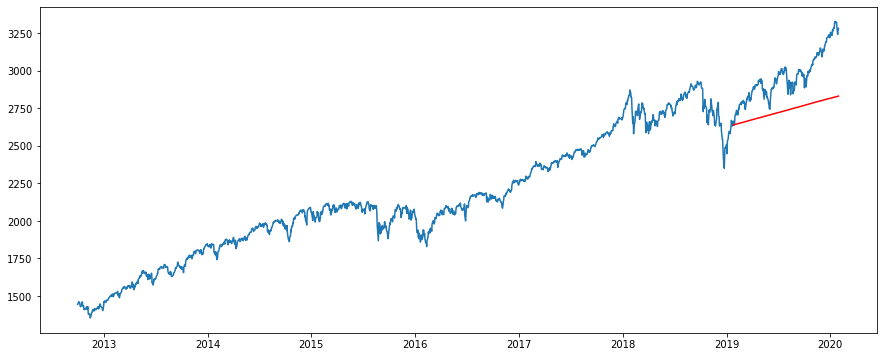

In [37]:
# 予測
pred = res_season_rw.predict('2019-01-24', '2020-01-30')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(SP500["Adj Close"])
plt.plot(pred, "r")

In [42]:
SP500_rmsle=rmsle(SP500["Adj Close"]["2019-01-24":], pred)

In [43]:
SP500_rmsle

0.08517407057478157

## ２、HANG SENG INDEXについて分析

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Optimization terminated successfully.
         Current function value: 6.008781
         Iterations: 29
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: 6.008781
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                          Unobserved Components Results                           
Dep. Variable:                  Adj Close   No. Observations:                 1799
Model:             random walk with drift   Log Likelihood              -10809.796
Date:                    Sat, 01 Feb 2020   AIC                          21621.592
Time:                            00:15:24   BIC                          21627.086
Sample:                                 0   HQIC                         21623.620
                                   - 1799                                         
Covariance Type:                      opg                                         
                   coef    st

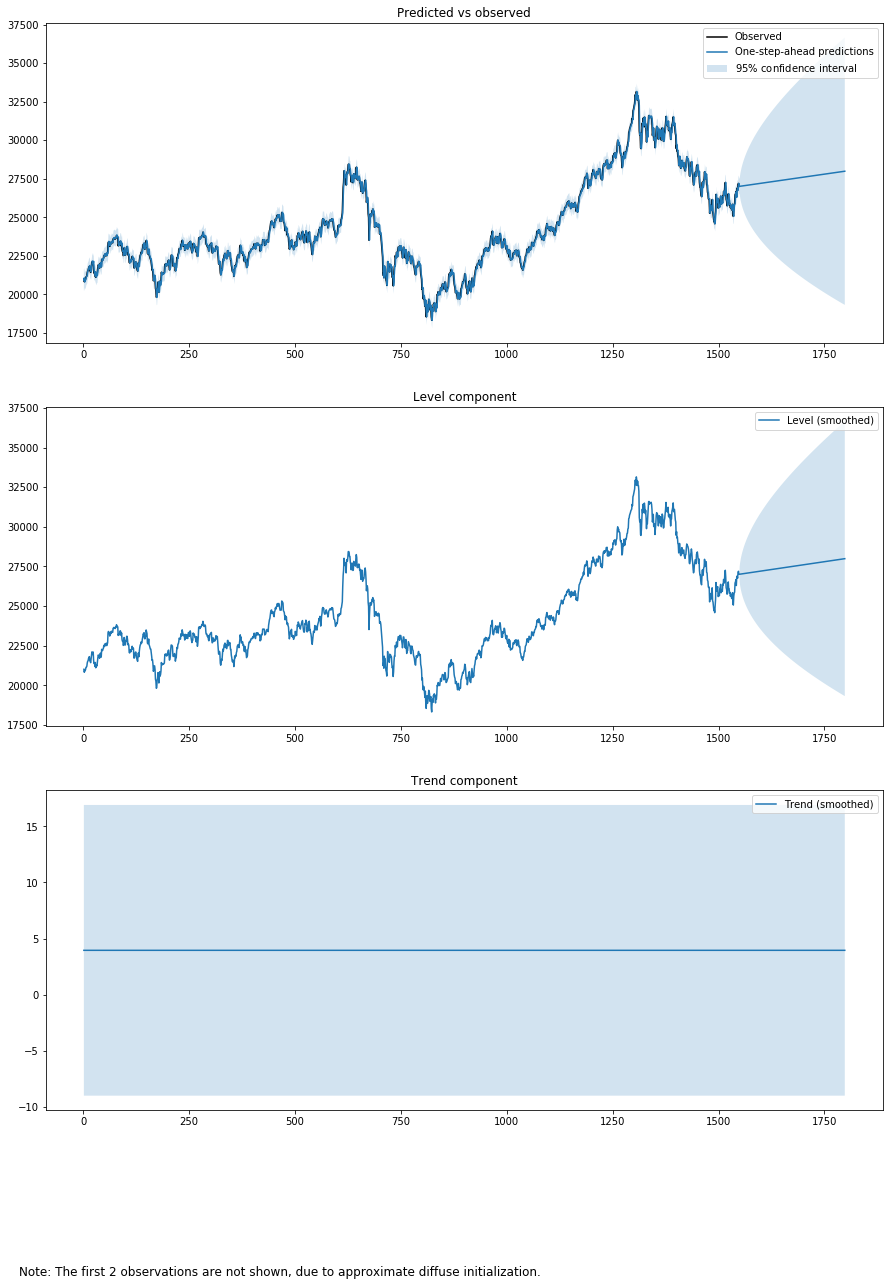

In [44]:
mod_season_rw = sm.tsa.UnobservedComponents(
    HANG_SENG_INDEX_ts,
    'random walk with drift')

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_rw = mod_season_rw.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_rw.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_rw.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_rw.plot_components()

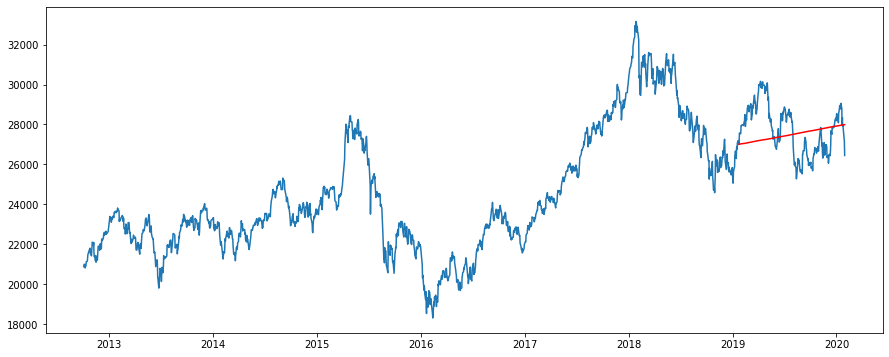

In [45]:
# 予測
pred = res_season_rw.predict('2019-01-24', '2020-01-30')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(HANG_SENG_INDEX["Adj Close"])
plt.plot(pred, "r")

In [46]:
HANG_SENG_INDEX_rmsle=rmsle(HANG_SENG_INDEX["Adj Close"]["2019-01-24":], pred)

In [47]:
HANG_SENG_INDEX_rmsle

0.049950046179908815

## ３、CAC 40について分析

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Optimization terminated successfully.
         Current function value: 4.556373
         Iterations: 27
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 4.556373
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                          Unobserved Components Results                           
Dep. Variable:                  Adj Close   No. Observations:                 1870
Model:             random walk with drift   Log Likelihood               -8520.417
Date:                    Sat, 01 Feb 2020   AIC                          17042.835
Time:                            00:16:19   BIC                          17048.368
Sample:                                 0   HQIC                         17044.873
                                   - 1870                                         
Covariance Type:                      opg                                         
                   coef    st

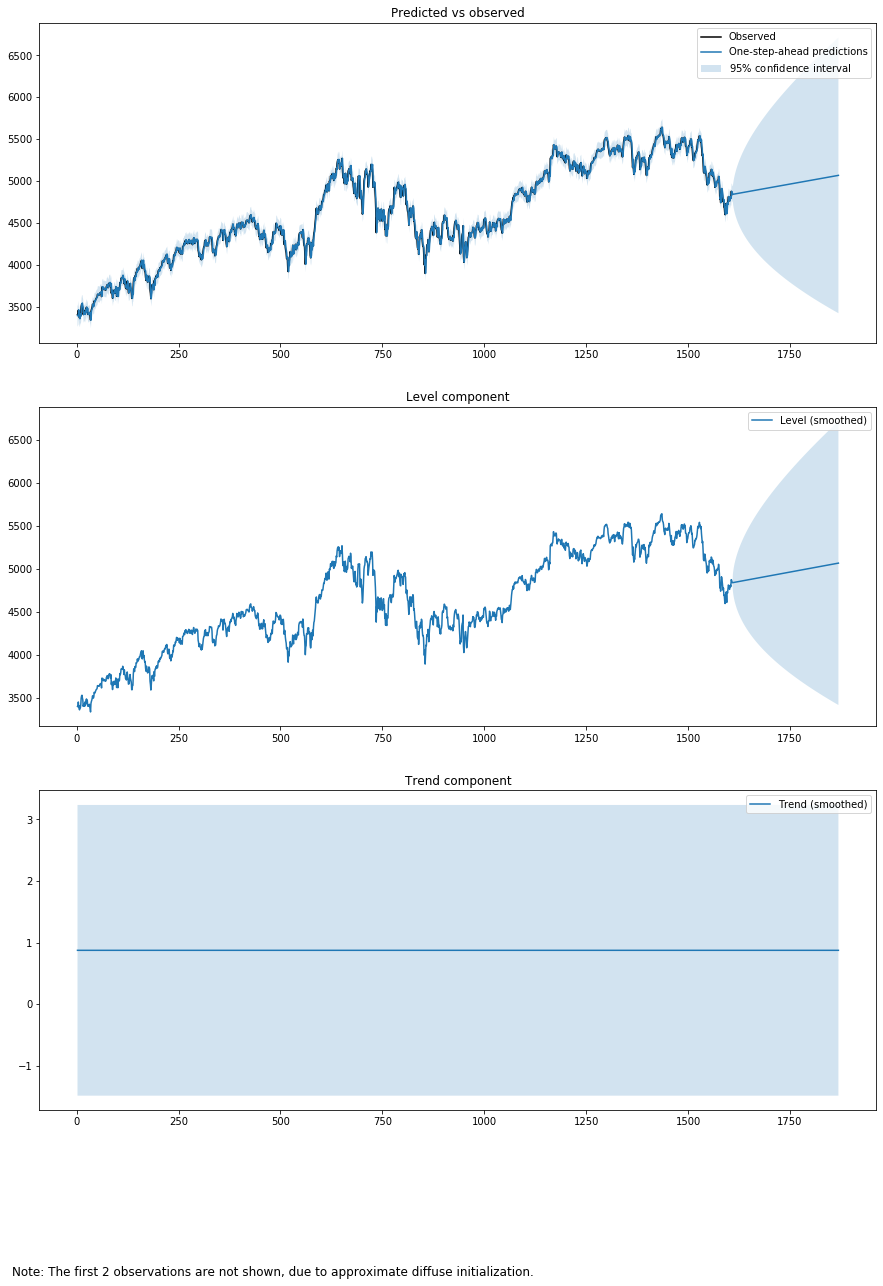

In [48]:
mod_season_rw = sm.tsa.UnobservedComponents(
    CAC_40_ts,
    'random walk with drift')

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_rw = mod_season_rw.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_rw.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_rw.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_rw.plot_components()

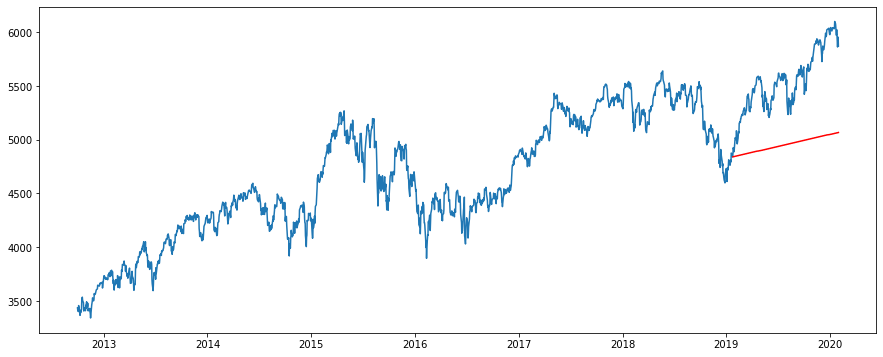

In [49]:
# 予測
pred = res_season_rw.predict('2019-01-24', '2020-01-30')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(CAC_40["Adj Close"])
plt.plot(pred, "r")

In [50]:
CAC_40_rmsle=rmsle(CAC_40["Adj Close"]["2019-01-24":], pred)

In [51]:
CAC_40_rmsle

0.11809342606476265

## ４、Nikkei 225について分析

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Optimization terminated successfully.
         Current function value: 5.908055
         Iterations: 30
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 5.908055
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                          Unobserved Components Results                           
Dep. Variable:                  Adj Close   No. Observations:                 1793
Model:             random walk with drift   Log Likelihood              -10593.142
Date:                    Sat, 01 Feb 2020   AIC                          21188.285
Time:                            00:17:21   BIC                          21193.775
Sample:                                 0   HQIC                         21190.312
                                   - 1793                                         
Covariance Type:                      opg                                         
                   coef    st

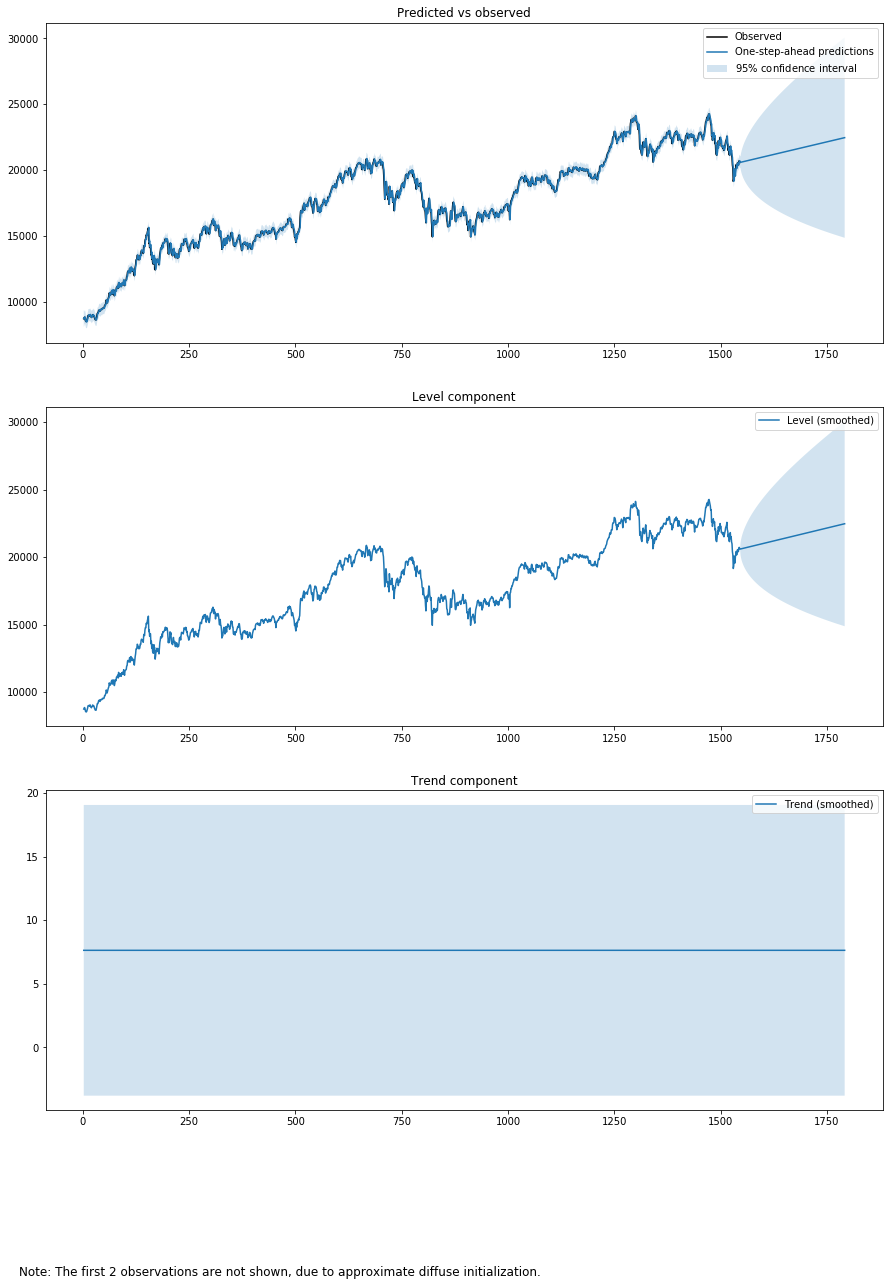

In [52]:
mod_season_rw = sm.tsa.UnobservedComponents(
    Nikkei_225_ts,
    'random walk with drift')

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_rw = mod_season_rw.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_rw.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_rw.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_rw.plot_components()

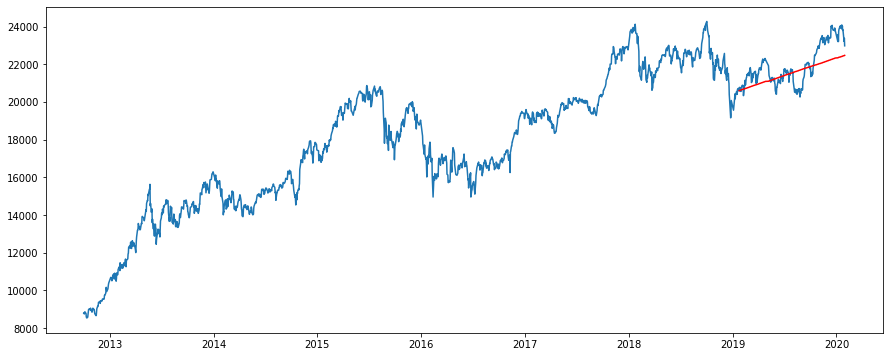

In [53]:
# 予測
pred = res_season_rw.predict('2019-01-24', '2020-01-30')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(Nikkei_225["Adj Close"])
plt.plot(pred, "r")

In [55]:
Nikkei_225_rmsle=rmsle(Nikkei_225["Adj Close"]["2019-01-24":], pred)

In [56]:
Nikkei_225_rmsle

0.037774403620611616

In [58]:
print("SP500",SP500_rmsle)
print("HANG_SENG_INDEX",HANG_SENG_INDEX_rmsle)
print("CAC_40",CAC_40_rmsle)
print("Nikkei_225",Nikkei_225_rmsle)

SP500 0.08517407057478157
HANG_SENG_INDEX 0.049950046179908815
CAC_40 0.11809342606476265
Nikkei_225 0.037774403620611616


## 結論：全部モデルの中で、Nikkei 225のモデルが一番精度の良い結果になりました。